In [5]:
# Importing libraries and the CSV file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Computer Hardware.csv')
df.columns = ['Vendor_Name', 'Model_Name', 'myct', 'mmin', 'mmax', 'cach','chmin','chmax', 'prp', 'erp']
print(df.head())

  Vendor_Name Model_Name  myct  mmin   mmax  cach  chmin  chmax  prp  erp
0      amdahl     470v/7    29  8000  32000    32      8     32  269  253
1      amdahl    470v/7a    29  8000  32000    32      8     32  220  253
2      amdahl    470v/7b    29  8000  32000    32      8     32  172  253
3      amdahl    470v/7c    29  8000  16000    32      8     16  132  132
4      amdahl     470v/b    26  8000  32000    64      8     32  318  290


In [6]:
# Dropping first two columns. They aren't useful for the analysis

df = df.drop(['Vendor_Name', 'Model_Name'], axis=1)
print(df.head())

   myct  mmin   mmax  cach  chmin  chmax  prp  erp
0    29  8000  32000    32      8     32  269  253
1    29  8000  32000    32      8     32  220  253
2    29  8000  32000    32      8     32  172  253
3    29  8000  16000    32      8     16  132  132
4    26  8000  32000    64      8     32  318  290


In [7]:
# Looking at data types

print(df.dtypes)

myct     int64
mmin     int64
mmax     int64
cach     int64
chmin    int64
chmax    int64
prp      int64
erp      int64
dtype: object


In [8]:
# Looking at the size and the description of the dataframe

print(df.shape)
df.describe()

(208, 8)


,myct,mmin,mmax,cach,chmin,chmax,prp,erp
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [9]:
# Checking for NULL values

print(df.isnull().sum())

myct     0
mmin     0
mmax     0
cach     0
chmin    0
chmax    0
prp      0
erp      0
dtype: int64


In [10]:
# Looking at correlation.
# 'prp' and 'erp' has strong positive corralation with 'mmin', 'mmax' and 'cach'

df.corr()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp
myct,1.000000,-0.337071,-0.379592,-0.340414,-0.300734,-0.255629,-0.306571,-0.287806
mmin,-0.337071,1.000000,0.757827,0.602788,0.526665,0.293877,0.798310,0.823113
mmax,-0.379592,0.757827,1.000000,0.600680,0.568594,0.562388,0.865576,0.904180
cach,-0.340414,0.602788,0.600680,1.000000,0.588128,0.423550,0.704642,0.687428
chmin,-0.300734,0.526665,0.568594,0.588128,1.000000,0.541762,0.608841,0.610094
chmax,-0.255629,0.293877,0.562388,0.423550,0.541762,1.000000,0.621309,0.606281
prp,-0.306571,0.798310,0.865576,0.704642,0.608841,0.621309,1.000000,0.966423
erp,-0.287806,0.823113,0.904180,0.687428,0.610094,0.606281,0.966423,1.000000


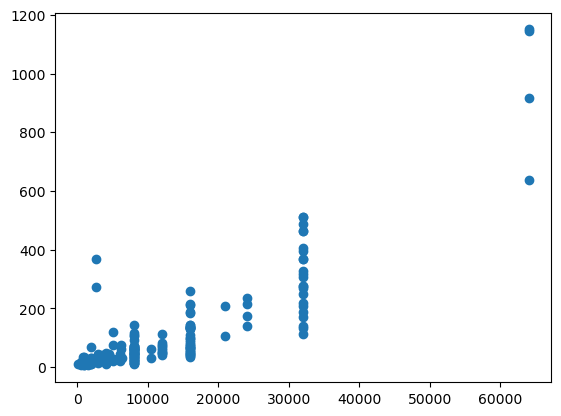

In [11]:
# Creating scatterplot to look at the corralation. We see that there are outliers

plt.scatter(df.mmax, df.prp)

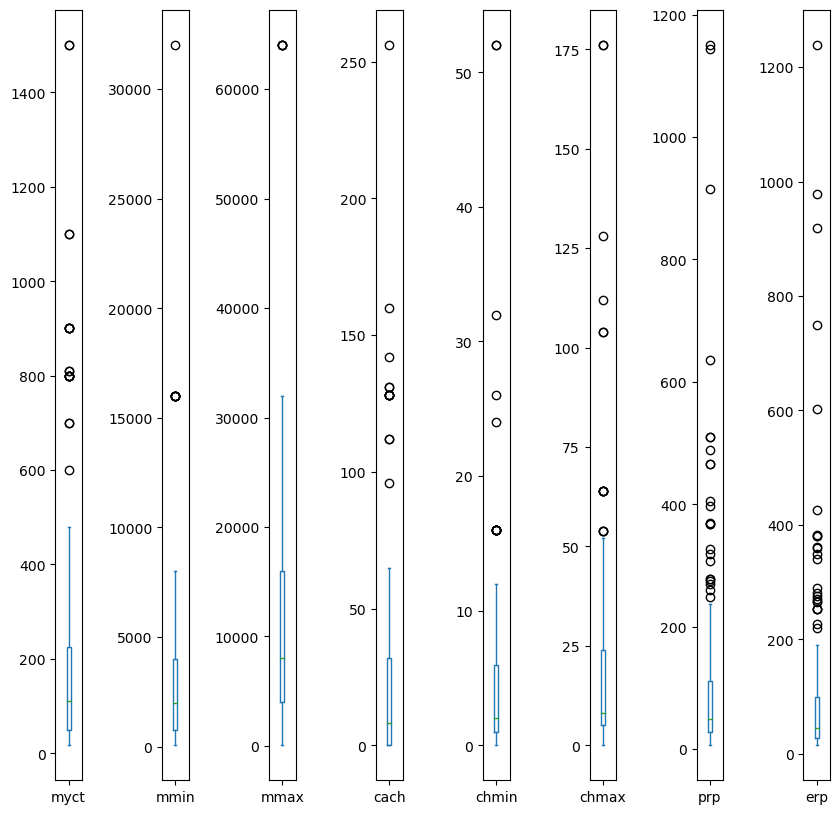

In [12]:
# Making box plots for each column to look at outliers

df.plot(
    kind='box',
    subplots= True,
    sharey= False,
    figsize=(10,10)
)
plt.subplots_adjust(wspace=3)
plt.show()

In [13]:
# Finding outliers using interquartile range. Replacing them with mean of each column

for i in df['mmax']:
    q1 = df['mmax'].quantile(0.25)
    q3 = df['mmax'].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    if i>upper or i< lower:
        df['mmax']= df['mmax'].replace(i, np.mean(df['mmax']))

In [14]:
for i in df['mmin']:
    q1 = df['mmin'].quantile(0.25)
    q3 = df['mmin'].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    if i>upper or i< lower:
        df['mmin']= df['mmin'].replace(i, np.mean(df['mmin']))

In [15]:
for i in df['cach']:
    q1 = df['cach'].quantile(0.25)
    q3 = df['cach'].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    if i>upper or i< lower:
        df['cach']= df['cach'].replace(i, np.mean(df['cach']))

In [16]:
for i in df['prp']:
    q1 = df['prp'].quantile(0.25)
    q3 = df['prp'].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    if i>upper or i< lower:
        df['prp']= df['prp'].replace(i, np.mean(df['prp']))

In [17]:
for i in df['erp']:
    q1 = df['erp'].quantile(0.25)
    q3 = df['erp'].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    if i>upper or i< lower:
        df['erp']= df['erp'].replace(i, np.mean(df['erp']))

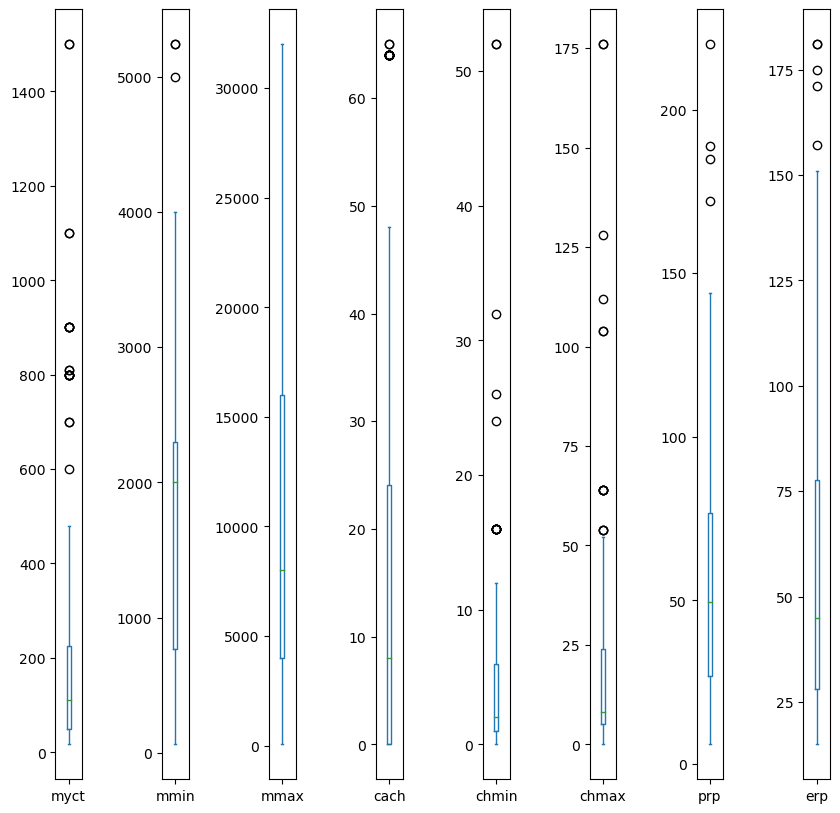

In [18]:
# Looking at changes

df.plot(
    kind='box',
    subplots= True,
    sharey= False,
    figsize=(10,10)
)
plt.subplots_adjust(wspace=3)
plt.show()

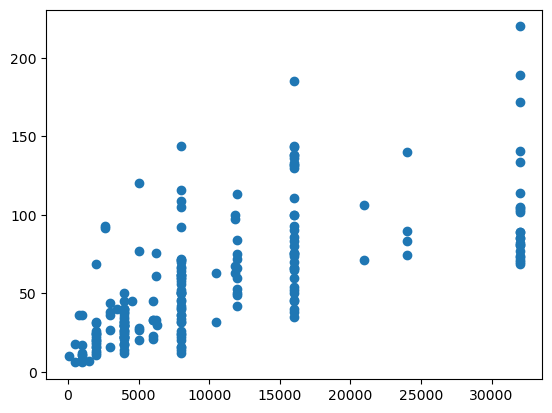

In [20]:
# Checking the plot again

plt.scatter(df.mmax, df.prp)